In [1]:
import numpy as np
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 298 * unit.kelvin / unit.kilocalories_per_mole

In [4]:
title_pairs = [["K417N", "-(N417K)"], ["E484K", "-(K484E)"], ["N501Y->N501Y/K417N", "N501Y->N501Y/K417N"], ["N501Y->N501Y/E484K", "N501Y->N501Y/E484K"], ["K417N->K417N/E484K", "K417N/E484K->K417N"]]
# title_pairs = [["N501Y", "Y501N"], ["K417N", "-(N417K)"], ["E484K", "-(K484E)"],  ["N501Y->N501Y/K417N", "N501Y->N501Y/K417N"], ["N501Y->N501Y/E484K", "N501Y->N501Y/E484K"], ["K417N->K417N/E484K", "K417N/E484K->K417N"]]
dir_num = 15
subdirs = [38, 40, 42, 44, 48]
# subdirs = [36, 38, 40, 42, 44, 48]
to_plot = np.zeros(shape=(len(np.array(title_pairs).flatten()), 3))
for i, subdir in enumerate(subdirs):
    with open(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/{subdir}/ddgs.pickle", "rb") as f:
        ddgs = pickle.load(f)
        to_plot[i*2] = np.array([np.mean(ddgs[subdir])*KT_KCALMOL, np.mean(ddgs[subdir])*KT_KCALMOL - np.percentile(ddgs[subdir], 2.5)*KT_KCALMOL , np.percentile(ddgs[subdir], 97.5)*KT_KCALMOL - np.mean(ddgs[subdir])*KT_KCALMOL])
        to_plot[(i*2)+1] = np.array([np.mean(ddgs[subdir+1])*-KT_KCALMOL, np.mean(ddgs[subdir+1])*KT_KCALMOL*-1 - np.percentile(ddgs[subdir+1], 2.5)*-KT_KCALMOL, np.percentile(ddgs[subdir+1], 97.5)*-KT_KCALMOL - np.mean(ddgs[subdir+1])*KT_KCALMOL*-1]) # take the negative of these so they match the forward transform values

In [5]:
to_plot

array([[ 0.43460461,  0.49358064,  0.44769783],
       [-0.1142892 , -0.52276642, -0.54554976],
       [-0.14667697,  0.27722969,  0.27497412],
       [-0.04852842, -0.26841155, -0.25312368],
       [ 0.10997323,  0.42860389,  0.39384044],
       [ 1.07259514, -0.48764638, -0.49206911],
       [-0.13346365,  0.28487491,  0.29453645],
       [-0.08600405, -0.32592251, -0.30282796],
       [-0.42135685,  0.2793292 ,  0.29037967],
       [-0.63755459, -0.31583563, -0.30734334]])

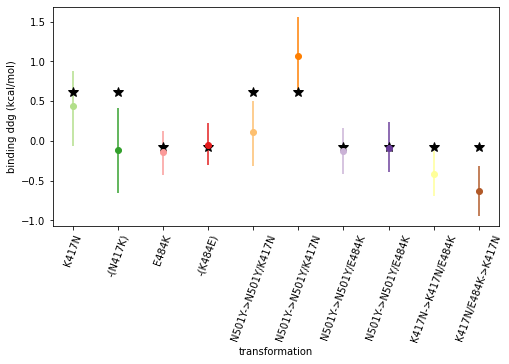

In [7]:
plt.figure(figsize=(8, 8))
plt.gcf().subplots_adjust(bottom=0.5)

cmap = plt.get_cmap('Paired')
# colors = [cmap(i) for i in range(len(to_plot))]
colors = [cmap(i+2) for i in range(len(to_plot))]

# Plot the perses predictions with error bars
for i, plot_value in enumerate(to_plot):
    plt.errorbar(i, plot_value[0], yerr=[[plot_value[1]], [plot_value[2]]], ls='none', marker='o', color=colors[i], ecolor=colors[i])

# Plot the experimental values
exp = [0.62, 0.62, -0.08, -0.08, 0.62, 0.62, -0.08, -0.08, -0.08, -0.08]
# exp = [-0.33, -0.33, 0.62, 0.62, -0.08, -0.08, 0.62, 0.62, -0.08, -0.08, -0.08, -0.08]
plt.plot(list(range(to_plot.shape[0])), exp, ls='none', marker='*',  markersize=10, color='black')

# Format the plot
plt.ylabel("binding ddg (kcal/mol)")
plt.xlabel("transformation")
plt.xticks(range(to_plot.shape[0]), np.array(title_pairs).flatten(), rotation=70)
# plt.savefig(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/ddg_vs_transform_with_cis.png", dpi=400)
plt.savefig(f"/data/chodera/zhangi/perses_benchmark/neq/{dir_num}/ddg_vs_transform_with_cis_nooutliers.png", dpi=400)